In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('../dataset/smoke detection/smoke_detection_iot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [24]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [25]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [26]:
df.drop('Unnamed: 0', axis=1, inplace=True)

<AxesSubplot:>

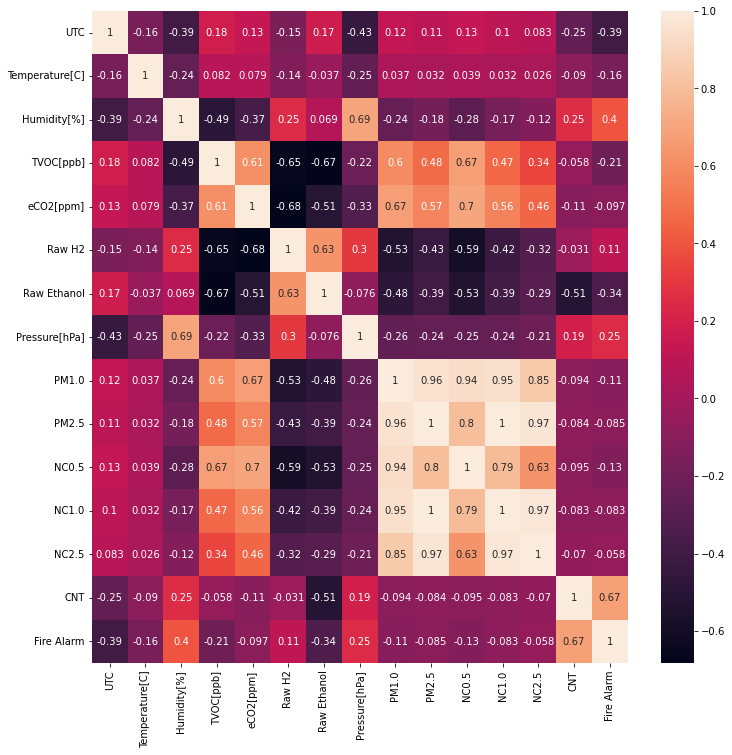

In [27]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='UTC', ylabel='Count'>

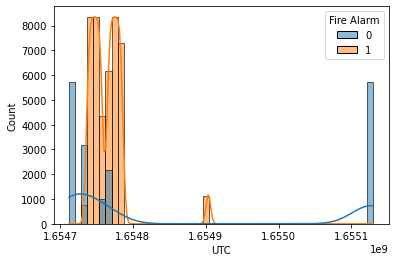

In [11]:
sns.histplot(data=df, x='UTC', hue='Fire Alarm', kde=True, bins=50)

<AxesSubplot:xlabel='Temperature[C]', ylabel='Count'>

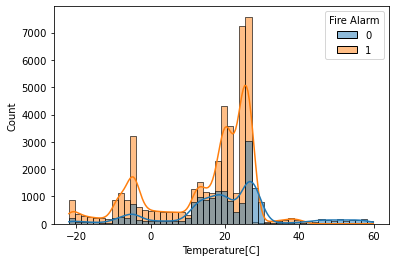

In [12]:
sns.histplot(data=df, x='Temperature[C]', hue='Fire Alarm', kde=True, bins=50)

In [28]:
# 标准化

import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

from sklearn.preprocessing import StandardScaler
X = df.drop('FireAlarm', axis=1)
y = df['FireAlarm']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
y_scaled = y

X_scaled.describe()

,UTC,TemperatureC,Humidity,TVOCppb,eCO2ppm,RawH2,RawEthanol,PressurehPa,PM10,PM25,NC05,NC10,NC25,CNT
count,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04,6.263000e+04
mean,-4.851404e-13,-1.322156e-15,-5.677861e-16,1.768094e-15,-1.023287e-14,5.853072e-16,-4.610572e-16,-6.163838e-14,2.763929e-15,1.118357e-15,1.176365e-15,8.776222e-17,2.456809e-16,-1.604567e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-7.261638e-01,-2.644975e+00,-4.263760e+00,-2.486143e-01,-1.416786e-01,-8.347780e+00,-7.280062e+00,-5.840500e+00,-1.090433e-01,-9.334044e-02,-1.152149e-01,-9.192422e-02,-7.388861e-02,-1.383476e+00
25%,-4.438293e-01,-3.465432e-01,-1.138709e-01,-2.319723e-01,-1.416786e-01,-4.127324e-01,-5.237958e-01,5.434443e-02,-1.076558e-01,-9.266241e-02,-1.131472e-01,-9.129931e-02,-7.385815e-02,-9.063317e-01
50%,-2.740568e-01,2.896750e-01,1.816635e-01,-1.230307e-01,-1.416786e-01,-6.773028e-02,-4.155118e-01,1.414752e-01,-1.070813e-01,-9.238917e-02,-1.122962e-01,-9.104691e-02,-7.384800e-02,-1.547006e-01
75%,-1.317202e-01,6.573419e-01,5.302136e-01,-9.640337e-02,-1.217402e-01,6.112632e-01,5.311529e-01,5.936536e-01,-1.067778e-01,-9.223737e-02,-1.118343e-01,-9.090874e-02,-7.384154e-02,8.756949e-01
max,3.072544e+00,3.061367e+00,3.007288e+00,7.432343e+00,3.113013e+01,3.158406e+00,2.716521e+00,9.264028e-01,1.542855e+01,2.289532e+01,1.429815e+01,2.334881e+01,2.764177e+01,1.906025e+00


In [30]:
data = pd.read_json('./demo.json')
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"Beverage, instant breakfast powder, chocolate,...",Dairy and Egg Products,19.90,0.285,0.385,0.4,0.0769,0.947,66.20,65.80,1.40,7.40,357.0,0.560,0.314,0.278,27481
1,"Beverage, instant breakfast powder, chocolate,...",Dairy and Egg Products,35.80,0.500,0.717,2.0,0.1380,1.705,41.00,39.00,5.10,7.40,358.0,2.162,1.189,1.027,27482
2,"Beverage, milkshake mix, dry, not chocolate",Dairy and Egg Products,23.50,0.880,0.780,1.6,0.0012,2.200,52.90,51.30,2.60,12.80,329.0,2.059,0.332,0.060,27483
3,"Butter oil, anhydrous",Dairy and Egg Products,0.28,0.004,0.002,NaN,0.0000,0.005,NaN,NaN,99.48,0.24,876.0,61.924,28.732,3.694,27484
4,"Butter, salted",Dairy and Egg Products,0.85,0.024,0.714,NaN,0.0000,0.024,0.06,0.06,81.11,15.87,717.0,51.368,21.021,3.043,27485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,"T.G.I. FRIDAY'S, French fries",Restaurant Foods,4.08,0.018,0.374,3.6,0.0000,0.669,37.34,0.32,15.06,41.09,301.0,2.824,4.118,7.502,35113
7633,"T.G.I. FRIDAY'S, Mac & Cheese, from kid's menu",Restaurant Foods,5.84,0.114,0.417,1.0,0.0000,0.135,16.42,2.74,4.47,71.48,129.0,1.579,1.014,1.323,35114
7634,"T.G.I. FRIDAY'S, chicken fingers, from kids' menu",Restaurant Foods,21.52,0.038,0.524,0.9,0.0000,0.335,12.08,0.29,13.91,49.88,260.0,2.656,3.448,6.874,35115
7635,"T.G.I. FRIDAY'S, classic sirloin steak",Restaurant Foods,30.61,0.007,0.194,NaN,0.0000,0.382,NaN,NaN,6.95,61.04,185.0,2.839,2.945,0.551,35116
